## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [1]:
!pip install nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.1 MB/s eta 0:00:00


In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.12.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [11]:
from datasets import load_dataset
dataset = load_dataset('emotion')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [15]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [75]:
def tweet_getter(data):
  tweets = [i['text'] for i in data]
  labels = [i['label'] for i in data]
  return tweets,np.array(labels)

In [76]:
x_train,y_train = tweet_getter(train)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [30]:
tokenizer = Tokenizer(num_words=10000 , oov_token='UNK')
tokenizer.fit_on_texts(x_train)

In [31]:
tokenizer.texts_to_sequences([x_train[0]])

[[2, 139, 3, 679]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

(array([  8.,  45., 310., 488., 539., 625., 626., 629., 613., 636., 654.,
        655., 608., 622., 609., 603., 559., 535., 530., 510., 452., 430.,
        382., 385., 330., 327., 336., 317., 238., 208., 200., 200., 167.,
        157., 141., 144., 120., 117., 117.,  88.,  96.,  72.,  66.,  66.,
         65.,  52.,  37.,  43.,  30.,  32.,  31.,  26.,  30.,  20.,  23.,
         14.,   9.,  10.,   4.,   4.,   4.,   1.,   4.,   1.]),
 array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
        28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40.,
        41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53.,
        54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66.]),
 <BarContainer object of 64 artists>)

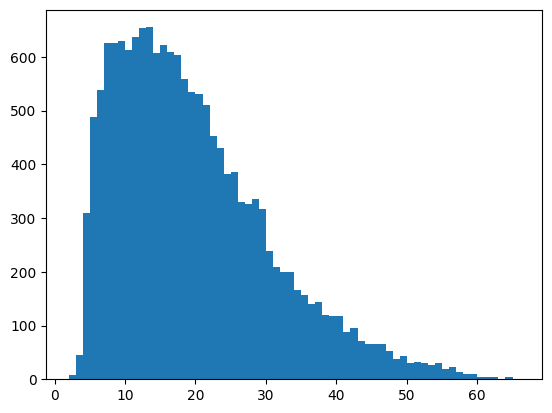

In [34]:
length = [len(i.split(' ')) for i in x_train]
plt.hist(length,bins=len(set(length)))

In [35]:
maxlen=50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [70]:
def get_sequences(tokenizer,tweets):
  sequences= tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences,truncating='post', padding = 'post', maxlen=maxlen)
  return np.array(padded)

In [71]:
padded_x_train = get_sequences(tokenizer,x_train)

In [72]:
padded_x_train.shape

(16000, 50)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [39]:
classes=set(y_train)

(array([4666.,    0., 5362.,    0., 1304.,    0., 2159.,    0., 1937.,
           0.,  572.]),
 array([0.        , 0.45454545, 0.90909091, 1.36363636, 1.81818182,
        2.27272727, 2.72727273, 3.18181818, 3.63636364, 4.09090909,
        4.54545455, 5.        ]),
 <BarContainer object of 11 artists>)

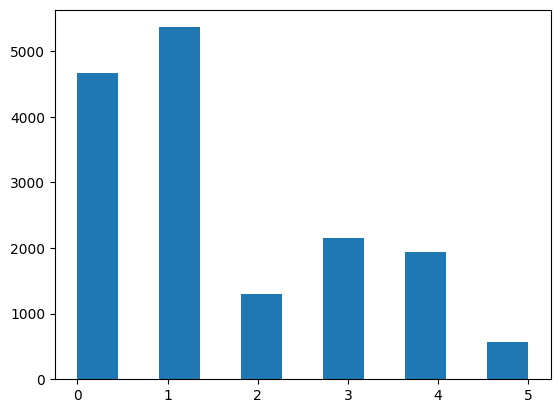

In [41]:
plt.hist(y_train , bins=11)

In [47]:
class_to_index = dict([('sadness',0),('joy',1),('love',2),('anger',3),('fear',4),('surprise',5)])
index_to_class = dict([(v,k) for k,v in class_to_index.items()])

In [48]:
index_to_class

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

In [49]:
class_to_index

{'sadness': 0, 'joy': 1, 'love': 2, 'anger': 3, 'fear': 4, 'surprise': 5}

In [50]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [54]:
def model():
  input=tf.keras.Input((50))
  embed= tf.keras.layers.Embedding(10000,16,input_length= maxlen)(input)
  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True))(embed)
  x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20))(x)
  output= tf.keras.layers.Dense(6, activation = 'softmax')(x)
  model = tf.keras.Model(inputs=input , outputs= output)
  return model

In [57]:
my_model=model()
my_model.summary()
my_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 50)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_6 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_7 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainab

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [77]:
x_val , y_val = tweet_getter(val)
val_seq = (get_sequences(tokenizer,x_val))
x_test , y_test = tweet_getter(test)

In [62]:
x_val[0],index_to_class[y_val[0]]

('im feeling quite sad and sorry for myself but ill snap out of it soon',
 'sadness')

In [78]:
h= my_model.fit(padded_x_train,y_train,validation_data=[val_seq,y_val],epochs=20, callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience=2 )])

Epoch 1/20
500/500 [==============================] - 46s 66ms/step - loss: 1.3086 - accuracy: 0.4888 - val_loss: 0.8318 - val_accuracy: 0.7175
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.5665 - accuracy: 0.8002 - val_loss: 0.5694 - val_accuracy: 0.8235
Epoch 3/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3658 - accuracy: 0.8734 - val_loss: 0.4989 - val_accuracy: 0.8285
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2498 - accuracy: 0.9147 - val_loss: 0.4170 - val_accuracy: 0.8675
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1954 - accuracy: 0.9364 - val_loss: 0.4219 - val_accuracy: 0.8765
Epoch 6/20
500/500 [==============================] - 8s 15ms/step - loss: 0.1430 - accuracy: 0.9548 - val_loss: 0.3969 - val_accuracy: 0.8835
Epoch 7/20
500/500 [==============================] - 6s 13ms/step - loss: 0.1074 - accuracy: 0.9668 - val_loss: 0.4228 - val_accuracy: 0.882

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

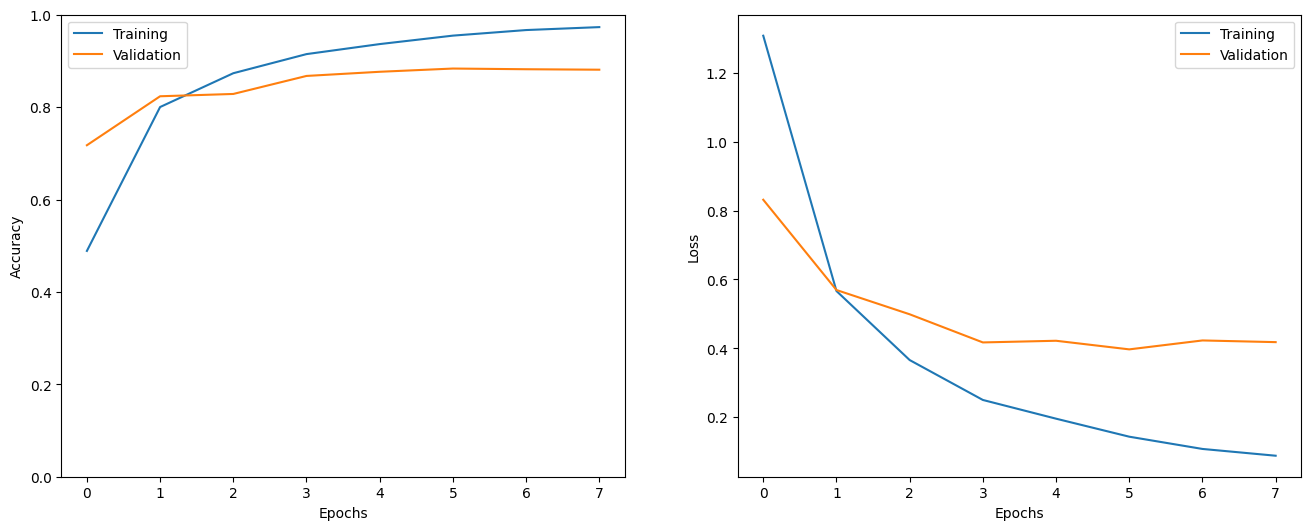

In [79]:
show_history(h)

In [80]:
test_seq = (get_sequences(tokenizer,x_test))

In [101]:
y_hat=my_model.predict(test_seq)

63/63 [==============================] - 1s 10ms/step


In [91]:
(np.argmax(y_hat[0]),y_test[0])

(0, 0)

In [90]:
_ = my_model.evaluate(test_seq,y_test)

63/63 [==============================] - 1s 9ms/step - loss: 0.4913 - accuracy: 0.8655


In [102]:
y_hat= [np.argmax(i) for i in y_hat]


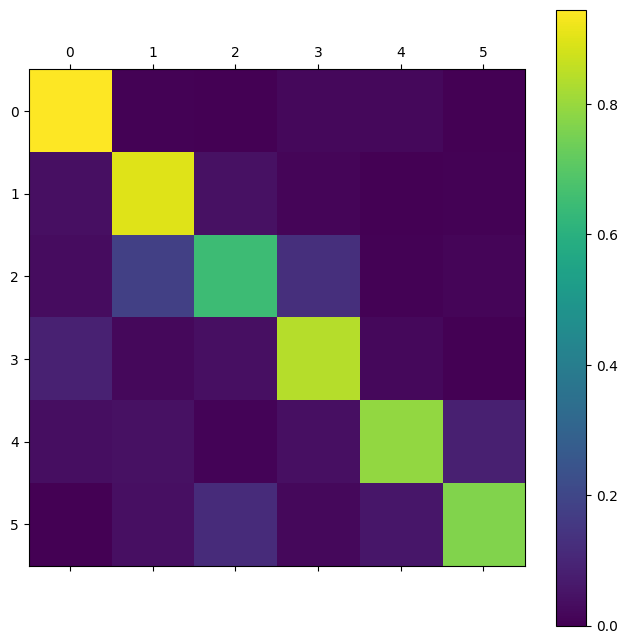

In [103]:
show_confusion_matrix(y_hat,y_test,list(classes))